In [1]:
# 3-mers Spectrum- MIC-Matrix

import pandas as pd

matrix = pd.read_csv('threemers_mics_matrix.csv', index_col=0)

matrix

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,nalidixic acid,ampicillin,sulfisoxazole,cefoxitin,tetracycline,ceftiofur,amoxicillin/clavulanic acid,streptomycin,azithromycin,kanamycin
0,0.032689,0.033219,0.026641,0.035482,0.022756,0.030556,0.034822,0.018978,0.022754,0.037276,...,4.0,1.0,16.0,4.0,32.0,0.5,1.0,8.0,8.0,NaN
1,0.033627,0.033219,0.027929,0.036025,0.022657,0.030048,0.034508,0.019134,0.023087,0.037241,...,4.0,1.0,256.0,4.0,32.0,1.0,1.0,64.0,8.0,NaN
2,0.032420,0.033699,0.025912,0.035068,0.023445,0.031450,0.034607,0.019167,0.022374,0.036822,...,4.0,1.0,32.0,4.0,32.0,0.5,1.0,4.0,8.0,NaN
3,0.033040,0.032997,0.027447,0.035513,0.022467,0.030157,0.034945,0.018968,0.022879,0.037379,...,4.0,1.0,32.0,4.0,32.0,1.0,1.0,8.0,8.0,NaN
4,0.033244,0.033400,0.027070,0.035686,0.022698,0.030388,0.034927,0.019277,0.022415,0.036906,...,32.0,1.0,64.0,2.0,4.0,0.5,1.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,0.032315,0.033581,0.026122,0.035137,0.023211,0.031134,0.035051,0.019219,0.022476,0.036801,...,4.0,1.0,32.0,2.0,32.0,1.0,1.0,4.0,8.0,NaN
1933,0.033433,0.033391,0.028279,0.035625,0.023124,0.030113,0.034067,0.019714,0.023152,0.037226,...,4.0,32.0,256.0,16.0,32.0,8.0,32.0,64.0,4.0,NaN
1934,0.032771,0.033541,0.027095,0.035151,0.022893,0.030615,0.034811,0.019497,0.022603,0.037078,...,4.0,32.0,256.0,32.0,32.0,8.0,32.0,64.0,4.0,64.0
1935,0.032870,0.033419,0.027375,0.035166,0.023030,0.030439,0.034605,0.019368,0.022836,0.037386,...,4.0,32.0,256.0,32.0,32.0,8.0,32.0,4.0,4.0,NaN


Text(0, 0.5, 'Amount of genomes')

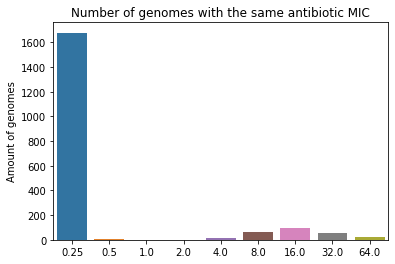

In [3]:
# Bar chart showing the number of genomes with the same antibiotic MIC values

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# List of unique MIC values without NaN values
mic_values = matrix['ceftriaxone'].loc[matrix['ceftriaxone']>0].sort_values().unique()

# Number of genomes with the same antibiotic MIC
amount = [len(matrix.loc[matrix['ceftriaxone']==mic]) for mic in mic_values]

# Set the width and height of the figure
plt.figure(figsize=(6,4))

# Add title
plt.title("Number of genomes with the same antibiotic MIC")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=mic_values, y=amount)

# Add label for vertical axis
plt.ylabel("Amount of genomes")

In [5]:
# Number of genomes with the same MIC, by antibiotic.

import numpy as np

antibiotics = matrix.columns[-15:]
amounts = []
for antibiotic in antibiotics:
    mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
    amount = []
    for mic in mic_values:
        amount.append(len(matrix.loc[matrix[antibiotic]==mic]))
    amounts.append(pd.DataFrame(np.reshape(amount, (1,-1)), columns=mic_values))
amounts_dframe = amounts[0].append(amounts[1:15], sort=False, ignore_index=True)

print(amounts[0])
print(amounts[1])
amounts_dframe

   0.25   0.50   1.00   2.00   4.00   8.00   16.00  32.00  64.00
0   1678      5      1      1     14     67     93     57     21
   0.120  0.125  0.250  0.500  1.000  2.000  4.000
0   1091    660    140      9      2      1     34


,0.015,0.030,0.060,0.120,0.125,0.250,0.500,1.000,2.000,4.000,8.000,16.000,32.000,64.000,128.000,256.000
0,NaN,NaN,NaN,NaN,NaN,1678.0,5.0,1.0,1.0,14.0,67.0,93.0,57.0,21.0,NaN,NaN
1,NaN,NaN,NaN,1091.0,660.0,140.0,9.0,2.0,1.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1596.0,299.0,10.0,NaN,5.0,6.0,17.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,430.0,1078.0,198.0,11.0,4.0,20.0,196.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,672.0,1113.0,43.0,93.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,545.0,1328.0,26.0,15.0,19.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1246.0,182.0,8.0,NaN,2.0,499.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,713.0,283.0,17.0,649.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,836.0,700.0,108.0,43.0,209.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769.0,6.0,6.0,1156.0,NaN,NaN,NaN


Text(0.5, 33.0, 'Antibiotic MIC (micrograms per milliliter)')

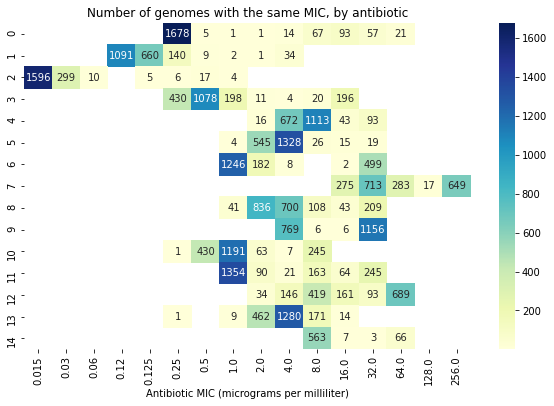

In [6]:
# Heatmap showing the number of genomes with the same MIC, by antibiotic.

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of genomes with the same MIC, by antibiotic")

# Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
sns.heatmap(data=amounts_dframe, annot=True,fmt='.4g',cmap="YlGnBu")

# Add label for horizontal axis
plt.xlabel("Antibiotic MIC (micrograms per milliliter)")

Text(0.5, 33.0, 'Antibiotic MIC (micrograms per milliliter)')

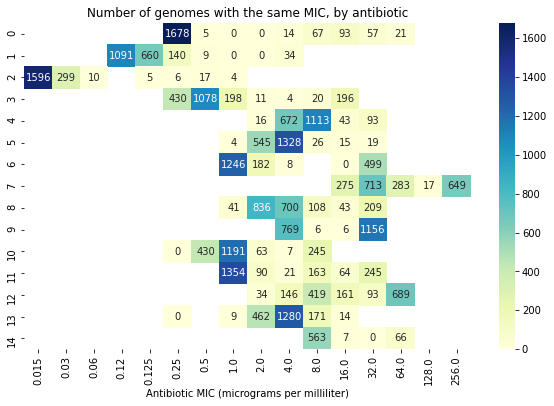

In [7]:
# Number of genomes with the same MIC, by antibiotic.

antibiotics = matrix.columns[-15:]
amounts = []
for antibiotic in antibiotics:
    mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
    amount = []
    for mic in mic_values:
        length = len(matrix.loc[matrix[antibiotic]==mic])
        # minimum number of genomes by category
        if length >=4:
            amount.append(length)
        else:
            amount.append(0)
    amounts.append(pd.DataFrame(np.reshape(amount, (1,-1)), columns=mic_values))
amounts_dframe = amounts[0].append(amounts[1:15], sort=False, ignore_index=True)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of genomes with the same MIC, by antibiotic")

# Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
sns.heatmap(data=amounts_dframe, annot=True,fmt='.4g',cmap="YlGnBu")

# Add label for horizontal axis
plt.xlabel("Antibiotic MIC (micrograms per milliliter)")

In [ ]:
# Atibiotic
antibiotic = 'ceftriaxone'
# list of unique mic values (leaving nan values)
mic_values_uniq = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
# list of MIC values
mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].values
# by definition we need to reshape the list of mics
mic_reshape = np.reshape(mic_values,(-1,1))

In [ ]:
# Define the features input (X) and the target output (y) variables
X = matrix.iloc[:,0:32].to_numpy()
y = matrix.iloc[:,32].to_numpy()

# Split data into training and validation data, for both features and target.
n_train = 1600
train_X, val_X = X[:n_train, :], X[n_train:, :]
train_y, val_y = y[:n_train], y[n_train:]

# Standardize the training data
scaler_X = StandardScaler().fit(train_X)
scaler_y = StandardScaler().fit(train_y.reshape(len(train_y),1))
train_X = scaler_X.transform(train_X)
train_y = scaler_y.transform(train_y.reshape(len(train_y),1))
val_X = scaler_X.transform(val_X)
val_y = scaler_y.transform(val_y.reshape(len(val_y),1))

# Define model
model = Sequential()
model.add(Dense(25, input_dim=32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt)

# Fit model
history = model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=50, verbose=0)

In [ ]:
# concat X_test and y_test
pd.DataFrame(X_test)
pd.DataFrame(y_test)
test_data = pd.concat([pd.DataFrame(X_test),pd.DataFrame(mic_reshape)], axis=1, join='inner')
test_data_enc = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test)], axis=1, join='inner')
    
accuracy = []
for mic in mic_values_uniq:
    X_test_class = test_data.loc[test_data.iloc[:,136]==mic].iloc[:,0:136].to_numpy()
    if len(X_test_class)!=0:
        y_test_class = test_data_enc.loc[test_data.iloc[:,136]==mic].iloc[:,136:145].to_numpy()
        scores = model_from_file.evaluate(X_test_class, y_test_class, verbose=0)
        accuracy.append(scores[1])
    else:
        accuracy.append(0)
        
accuracy

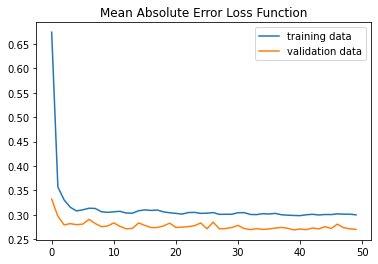

Train: 0.299, Val: 0.270


In [7]:
# ML regression algorithm with Mean Absolute Error Loss function

# With the MAE metric, we take the absolute value of each error.
# This converts each error to a positive number. We then take the 
# average of those absolute errors.

import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

# Define the features input (X) and the target output (y) variables
X = matrix.iloc[:,0:32].to_numpy()
y = matrix.iloc[:,32].to_numpy()

# Split data into training and validation data, for both features and target.
n_train = 1600
train_X, val_X = X[:n_train, :], X[n_train:, :]
train_y, val_y = y[:n_train], y[n_train:]

# Standardize the training data
scaler_X = StandardScaler().fit(train_X)
scaler_y = StandardScaler().fit(train_y.reshape(len(train_y),1))
train_X = scaler_X.transform(train_X)
train_y = scaler_y.transform(train_y.reshape(len(train_y),1))
val_X = scaler_X.transform(val_X)
val_y = scaler_y.transform(val_y.reshape(len(val_y),1))

# Define model
model = Sequential()
model.add(Dense(25, input_dim=32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt)

# Fit model
history = model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=50, verbose=0)

# Plot loss during training
pyplot.title('Mean Absolute Error Loss Function')
pyplot.plot(history.history['loss'], label='training data')
pyplot.plot(history.history['val_loss'], label='validation data')
pyplot.legend()
pyplot.show()

# Evaluate the model: Compute the Mean Absolute Error
train_mae = model.evaluate(train_X, train_y, verbose=0)
val_mae = model.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Val: %.3f' % (train_mae, val_mae))

In [8]:
# Model Validation

# Model prediction
val_pred = model.predict(val_X)

# Calculate the Mean Absolute Error in Validation Data
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_y, val_pred)

0.27027805166988356

In [9]:
# Mean absolute error
def mae(true, pred):
    aux=0
    for i in range(len(true)):
        aux = aux + abs(true[i]-pred[i])
    return aux/len(true)

mae(val_y, val_pred)

array([0.27027805])

In [10]:
# Mean absolute porcentage error
def mape(true, pred):
    aux=0
    for i in range(len(true)):
        aux = aux + abs(true[i]-pred[i])/abs(true[i])
    return aux/len(true)

mape(val_y, val_pred)

array([0.24659973])

In [16]:
# Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%)

# Mean absolute percentage accuracy
def mapa(true, pred):
    aux=0
    for i in range(len(true)):
        aux = aux + abs(pred[i]/true[i])
    return 100*aux/len(true)

mapa(val_y, val_pred)

array([87.58928066])

In [12]:
# Model predictions
val_pred = model.predict(val_X)
scaler_y.inverse_transform(val_pred)

array([[0.6274378 ],
       [0.2637474 ],
       [0.26008195],
       [0.3256027 ],
       [0.3778469 ],
       [0.2912926 ],
       [0.45996875],
       [0.26460618],
       [0.28128952],
       [0.2715711 ],
       [0.4657628 ],
       [0.3717386 ],
       [0.14128585],
       [0.32367867],
       [0.27221054],
       [0.3848099 ],
       [0.28016156],
       [0.80389136],
       [0.37684578],
       [0.25263804],
       [0.33744377],
       [0.35911387],
       [0.21232672],
       [0.10280176],
       [0.76923794],
       [0.55656666],
       [0.26470274],
       [0.28891128],
       [0.21688361],
       [0.2570843 ],
       [0.18093772],
       [0.28354686],
       [0.2808916 ],
       [0.746175  ],
       [0.26111597],
       [0.27780598],
       [0.32454056],
       [0.27428478],
       [0.39766878],
       [0.15595599],
       [0.42800206],
       [0.3232755 ],
       [0.30206388],
       [0.22521158],
       [0.25243157],
       [0.3024451 ],
       [0.19834991],
       [0.638

In [13]:
scaler_y.inverse_transform(val_y)

array([[ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [16.  ],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [32.  ],
       [ 0.25],
       [ 0.25],
       [ 8.  ],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 8.  ],
       [ 0.25],
       [16.  ],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 8.  ],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25],
       [